# Name : Bhavik Ransubhe
# Class : B.E (B) COMPUTER
# Roll No. : 41261

### PROBLEM STATEMENT : 

*Twitter Data Analysis: Use Twitter data for sentiment analysis. The dataset is 3MB in size and has 31,962 tweets. Identify the tweets which are hate tweets and which are not. Sample Test data set available here https://datahack.analyticsvidhya.com/contest/practice-problemtwitter-sentiment-analysis/*

In [1]:
#import libraries
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 

In [2]:
#Load dataset
dataset  = pd.read_csv('tweets_data.csv')

In [3]:
#First 10 negative tweets
dataset[dataset['label'] == 0].head(10)

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
5   6      0  [2/2] huge fan fare and big talking before the...
6   7      0   @user camping tomorrow @user @user @user @use...
7   8      0  the next school year is the year for exams.ð...
8   9      0  we won!!! love the land!!! #allin #cavs #champ...
9  10      0   @user @user welcome here !  i'm   it's so #gr...

In [4]:
#First 10 positive tweets
dataset[dataset['label'] == 1].head(10)

id  label                                              tweet
13    14      1  @user #cnn calls #michigan middle school 'buil...
14    15      1  no comment!  in #australia   #opkillingbay #se...
17    18      1                             retweet if you agree! 
23    24      1    @user @user lumpy says i am a . prove it lumpy.
34    35      1  it's unbelievable that in the 21st century we'...
56    57      1            @user lets fight against  #love #peace 
68    69      1  ð©the white establishment can't have blk fol...
77    78      1  @user hey, white people: you can call people '...
82    83      1  how the #altright uses  &amp; insecurity to lu...
111  112      1  @user i'm not interested in a #linguistics tha...

In [5]:
dataset.shape

(31962, 3)

In [6]:
dataset["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

## Data Cleaning

In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

### 1. Removing Twitter Handles (@user)

In [8]:
dataset['tidy_tweet'] = np.vectorize(remove_pattern)(dataset['tweet'], "@[\w]*") 
dataset.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                          tidy_tweet  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can't use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide: society now    #motivation

### 2. Removing Punctuations, Numbers, and Special Characters

In [9]:
dataset['tidy_tweet'] = dataset['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
dataset.head(10)

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   
5   6      0  [2/2] huge fan fare and big talking before the...   
6   7      0   @user camping tomorrow @user @user @user @use...   
7   8      0  the next school year is the year for exams.ð...   
8   9      0  we won!!! love the land!!! #allin #cavs #champ...   
9  10      0   @user @user welcome here !  i'm   it's so #gr...   

                                          tidy_tweet  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can t use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide  society now    #motivation  
5        huge fan fare and big talking before the...  
6                   camping tomorrow        danny     
7  the next school year is the year for exams    ...  
8  we won    love the land    #allin #cavs #champ...  
9              welcome here    i m   it s so #gr

### 3. Removing Short Words

In [10]:
dataset['tidy_tweet'] = dataset['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
dataset.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                          tidy_tweet  
0  when father dysfunctional selfish drags kids i...  
1  thanks #lyft credit cause they offer wheelchai...  
2                                bihday your majesty  
3                         #model love take with time  
4                     factsguide society #motivation

In [11]:
#tokenization
tokenized_tweet = dataset['tidy_tweet'].apply(lambda x: x.split()) 

In [12]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [13]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [14]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
dataset['tidy_tweet'] = tokenized_tweet

In [15]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [16]:
# extracting hashtags from normal tweets
HT_regular = hashtag_extract(dataset['tidy_tweet'][dataset['label'] == 0])

# extracting hashtags from hate tweets tweets
HT_negative = hashtag_extract(dataset['tidy_tweet'][dataset['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

[Text(0, 0.5, 'Count')]

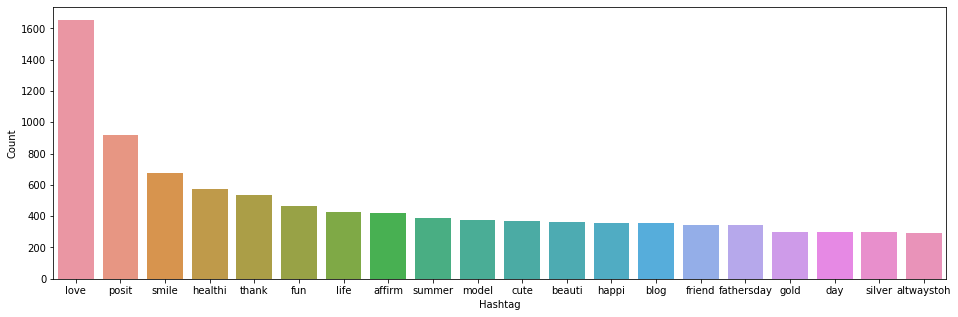

In [17]:
# Non Hate Tweets
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')

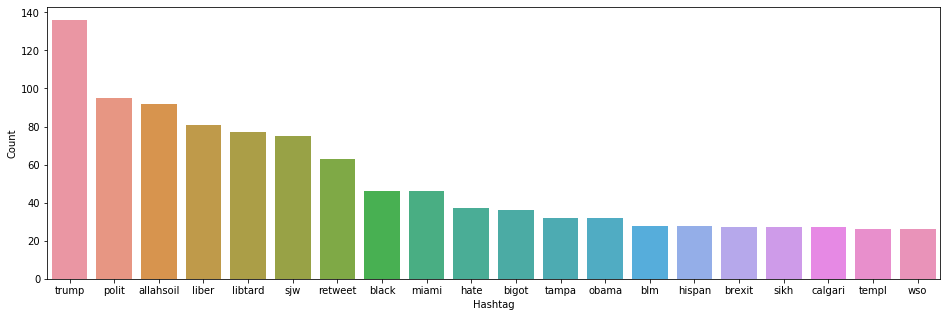

In [18]:
# Hate tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

Model Training 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
X = dataset["tidy_tweet"]
y = dataset["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [21]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(21414, 23783) (10548, 23783)


In [22]:
lreg = LogisticRegression()
lreg.fit(train_vectors,y_train)

from  sklearn.metrics  import accuracy_score
from sklearn import metrics

predicted = lreg.predict(test_vectors)

print("Accuracy:",accuracy_score(y_test,predicted))
print("Precision:",metrics.precision_score(y_test, predicted))

Accuracy: 0.9489002654531665
Precision: 0.8836206896551724


C:\Users\bhavi\.Origin\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
